In [1]:
import pandas
import numpy
from matplotlib import pyplot as plt
import sklearn.tree

numpy.random.seed(0)

In [2]:
def process_app_one_hot(dataframe):
    """
    Bins age into Young, Adult
    Converts to categorical variables
    """

    column_age = "Age"
    bins_age = [0, 18, float("inf")] # Adult in U.S.
    labels_age = ['Young', 'Adult'] # labels must be one larger

    dataframe_p = dataframe.copy()
    # Bins age into Young, Adult
    dataframe_p[column_age] = pandas.cut(dataframe[column_age], bins_age, labels = labels_age) # labels keyword necessary
    # Converts to categorical variables
    dataframe_p = pandas.get_dummies(dataframe_p, prefix_sep='_') # defaults to all columns

    return dataframe_p

def process_app(dataframe):
    """
    Keeps age numeric
    Converts Platform to categorical
    Keeps App intact
    """   
    columns_bin = ["Platform"]

    dataframe_p = dataframe.copy()
    dataframe_p = pandas.get_dummies(dataframe, columns=columns_bin, prefix_sep='_')

    return dataframe_p

dict_data = {
    'Platform': ['iPhone','iPhone','Android','iPhone','Android','Android'],
    'Age': [15, 25, 32, 35, 12, 14],
    'App': ['Atom Count', 'Check Mate Mate', 'Beehive Finder', 'Check Mate Mate', 'Atom Count', 'Atom Count']
    }

data_app = pandas.DataFrame(dict_data)

In [3]:
data_app

,Platform,Age,App
0,iPhone,15,Atom Count
1,iPhone,25,Check Mate Mate
2,Android,32,Beehive Finder
3,iPhone,35,Check Mate Mate
4,Android,12,Atom Count
5,Android,14,Atom Count


In [4]:
## With all categorical features

In [5]:
data_app_one_hot = process_app_one_hot(data_app)

columns_features = ['Platform_iPhone','Platform_Android','Age_Adult','Age_Young']
columns_labels = ['App_Atom Count','App_Beehive Finder','App_Check Mate Mate']

X = data_app_one_hot[columns_features]
y = data_app_one_hot[columns_labels]

data_app_one_hot

,Platform_Android,Platform_iPhone,Age_Young,Age_Adult,App_Atom Count,App_Beehive Finder,App_Check Mate Mate
0,0,1,1,0,1,0,0
1,0,1,0,1,0,0,1
2,1,0,0,1,0,1,0
3,0,1,0,1,0,0,1
4,1,0,1,0,1,0,0
5,1,0,1,0,1,0,0


In [6]:
model_categorical = sklearn.tree.DecisionTreeClassifier()
model_categorical.fit(X,y)
model_categorical.score(X,y)

1.0

[Text(0.6, 0.8333333333333334, 'Age_Young <= 0.5\ngini = 0.407\nsamples = 6\nvalue = [[3, 3]\n[5, 1]\n[4, 2]]'),
 Text(0.4, 0.5, 'Platform_Android <= 0.5\ngini = 0.296\nsamples = 3\nvalue = [[3, 0]\n[2, 1]\n[1, 2]]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [[2, 0]\n[2, 0]\n[0, 2]]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [[1, 0]\n[0, 1]\n[1, 0]]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [[0, 3]\n[3, 0]\n[3, 0]]')]

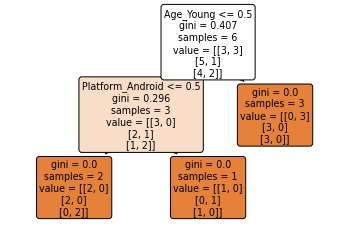

In [7]:
sklearn.tree.plot_tree(model_categorical, feature_names = columns_features, filled=True, rounded=True)

In [8]:
## With age as a numerical feature

In [9]:
data_app_p = process_app(data_app)

columns_features = ['Age','Platform_iPhone','Platform_Android']
features = data_app_p[columns_features].values
labels = data_app_p['App'].values

data_app_p

,Age,App,Platform_Android,Platform_iPhone
0,15,Atom Count,0,1
1,25,Check Mate Mate,0,1
2,32,Beehive Finder,1,0
3,35,Check Mate Mate,0,1
4,12,Atom Count,1,0
5,14,Atom Count,1,0


In [10]:
model_app = sklearn.tree.DecisionTreeClassifier()
model_app.fit(features, labels)
model_app.score(features, labels)

1.0

[Text(0.4, 0.8333333333333334, 'Age <= 20.0\ngini = 0.611\nsamples = 6\nvalue = [3, 1, 2]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(0.6, 0.5, 'Platform_iPhone <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]')]

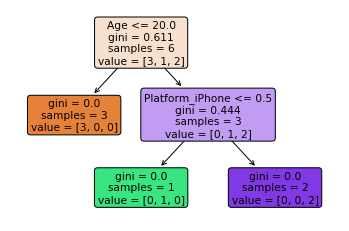

In [11]:
sklearn.tree.plot_tree(model_app, feature_names=columns_features, filled=True, rounded=True )